## 1) Import Libraries

In [ ]:
import numpy as np
import nltk
nltk.download('stopwords')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 2) Set Model Hyperparameters

In [27]:
#Hyperparameters
vocab_size = 2000
embedding_dim = 64
max_length = 500
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

## 3) Load Real Dataset

In [28]:
# Adding Dataset into articles and labels list
articles = []
labels = []
with open('/content/20ng-train-stemmed.txt') as file:
  docs = file.readlines()
  for line in docs:
    labels.append(line.split('\t')[0])
    article = line.split('\t')[1]
    for word in STOPWORDS:
      token = ' ' + word + ' '
      article = article.replace(token, ' ')
      article = article.replace(' ', ' ')
    articles.append(article)

In [29]:
# Clean Label Names
labels_new = []
for i in labels:
  i = i.replace('.', '')
  i = i.replace('-', '')
  labels_new.append(i)

## 4) Split data into 70% training and 30% validation datasets

In [30]:
train_articles, validation_articles, train_labels, validation_labels = train_test_split(articles, labels_new, test_size=0.3, stratify=labels_new)

In [ ]:
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

7905
7905
3388
3388


In [31]:
# Check distribution of training dataset
pd.Series(train_labels).value_counts()

recsporthockey          420
socreligionchristian    419
recmotorcycles          419
recsportbaseball        418
recautos                416
scimed                  416
scicrypt                416
scispace                415
compwindowsx            415
scielectronics          414
compsysibmpchardware    413
compgraphics            409
miscforsale             409
compsysmachardware      405
composmswindowsmisc     400
talkpoliticsmideast     395
talkpoliticsguns        381
altatheism              336
talkpoliticsmisc        325
talkreligionmisc        264
dtype: int64

In [32]:
 # Check distribution of validation dataset
 pd.Series(validation_labels).value_counts()

recsporthockey          180
scicrypt                179
recsportbaseball        179
recmotorcycles          179
socreligionchristian    179
compwindowsx            178
scispace                178
scimed                  178
recautos                178
scielectronics          177
compsysibmpchardware    177
miscforsale             176
compgraphics            175
compsysmachardware      173
composmswindowsmisc     172
talkpoliticsmideast     169
talkpoliticsguns        164
altatheism              144
talkpoliticsmisc        140
talkreligionmisc        113
dtype: int64

## 5a) Tokenization and Vectorization - Articles

In [33]:
# Tokenize articles for training datasets
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
train_sequences = tokenizer.texts_to_sequences(train_articles)
validation_sequences = tokenizer.texts_to_sequences(validation_articles)

print(train_sequences[10])
print(validation_sequences[10])

[1, 1, 337, 639, 5, 1, 1, 1, 3, 1, 1, 337, 1, 1, 219, 10, 1, 1, 1, 976, 210, 1, 1472, 192, 1735, 1, 1, 284, 192, 1, 1, 1, 318, 384, 119, 192, 239, 80, 1, 39, 1, 134, 807, 1, 936, 76, 1448, 384, 361, 1518, 159, 1, 247, 1, 2, 1, 1, 1958, 1895, 1, 192, 1, 1, 1235, 1, 1, 281, 210, 702, 1479, 173, 1, 546, 1, 192, 1, 1, 564, 1, 422, 1, 942, 16, 383, 251, 1374, 277, 416, 187, 1, 1, 918, 1]
[5, 18, 1, 1, 1760, 1, 1, 1760, 4, 339, 425, 1432, 65, 620, 1, 1, 25, 1, 1, 1, 240, 1, 1, 349, 366, 479, 27, 1, 309, 1, 1, 1432, 65, 620, 403, 299, 618, 179, 1644, 234, 1, 1, 1, 1, 994, 322, 256, 339, 1340, 653, 1, 1, 1432, 65, 620, 25, 1, 1, 1, 39, 1, 1754, 1, 67, 242, 86, 45, 1823, 242, 1, 584, 1077, 46, 212, 1835, 732, 720, 777, 234, 1, 100, 167, 295, 1, 157, 366, 100, 1, 1, 1658, 1, 2, 159, 462, 60, 1754, 1, 1, 147, 366, 1, 1, 39, 1, 240, 978, 1, 292, 297, 883, 1562, 824, 85, 203, 86, 1, 85, 1462, 618, 1352, 1, 1, 701, 1, 1, 1, 1760, 529, 1, 552, 1, 1760, 1, 552, 1454, 13, 529, 1, 300, 1, 1664, 1356, 1,

In [34]:
# Padding to the end of the training and validation articles
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

print(len(validation_sequences[10]))
print(len(validation_padded[10]))

195
500
300
500
93
500
158
500


## 5b) Tokenization and Vectorization - Labels

In [35]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels_new)
training_label_seq = np.asarray(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.asarray(label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[7]
[19]
[12]
(7905, 1)
[12]
[6]
[2]
(3388, 1)


## 6) Model Building

In [36]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 2000, and output embedding dimension of size 64
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(32, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          128000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
Total params: 204,384
Trainable params: 204,384
Non-trainable params: 0
_________________________________________________________________


In [37]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, None) <dtype: 'float32'>
(None, 32) <dtype: 'float32'>
embedding_1 (None, None) float32
bidirectional_1 (None, None, 64) float32
dense_2 (None, 128) float32
dense_3 (None, 64) float32


[None, None, None, None]

In [38]:
# Check dataset before model fitting
print(train_padded.shape)
print(training_label_seq.shape)
print(validation_padded.shape)
print(validation_label_seq.shape)

(7905, 500)
(7905, 1)
(3388, 500)
(3388, 1)


In [39]:
# Check dataset before model fitting
print(type(train_padded))
print(type(training_label_seq))
print(type(validation_padded))
print(type(validation_label_seq))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## 6) Model Validation

In [40]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
248/248 - 58s - loss: 2.8629 - accuracy: 0.1218 - val_loss: 2.3170 - val_accuracy: 0.2320 - 58s/epoch - 236ms/step
Epoch 2/10
248/248 - 53s - loss: 1.6645 - accuracy: 0.4633 - val_loss: 1.2304 - val_accuracy: 0.6222 - 53s/epoch - 214ms/step
Epoch 3/10
248/248 - 53s - loss: 0.9160 - accuracy: 0.7159 - val_loss: 0.9302 - val_accuracy: 0.7161 - 53s/epoch - 214ms/step
Epoch 4/10
248/248 - 53s - loss: 0.6000 - accuracy: 0.8204 - val_loss: 0.9582 - val_accuracy: 0.7240 - 53s/epoch - 215ms/step
Epoch 5/10
248/248 - 53s - loss: 0.5233 - accuracy: 0.8369 - val_loss: 0.7911 - val_accuracy: 0.7763 - 53s/epoch - 214ms/step
Epoch 6/10
248/248 - 53s - loss: 0.3743 - accuracy: 0.8861 - val_loss: 0.8364 - val_accuracy: 0.7721 - 53s/epoch - 214ms/step
Epoch 7/10
248/248 - 53s - loss: 0.3200 - accuracy: 0.9018 - val_loss: 0.8723 - val_accuracy: 0.7671 - 53s/epoch - 214ms/step
Epoch 8/10
248/248 - 53s - loss: 0.2476 - accuracy: 0.9264 - val_loss: 0.9100 - val_accuracy: 0.7789 - 53s/epoch - 215

## 7) Model Evaluation

In [41]:
score = model.evaluate(validation_padded, validation_label_seq, verbose=10)

print("Loss: %.3f \nAccuracy: %.3f" % (score[0], score[1]))

Loss: 0.994 
Accuracy: 0.779


In [42]:
LABELS = ['altatheism', 'compgraphics', 'composmswindowsmisc', 'compsysibmpchardware', 'compsysmachardware', 'compwindowsx', 'miscforsale', 'recautos', 'recmotorcycles', 'recsportbaseball',
              'recsporthockey', 'scicrypt', 'scielectronics', 'scimed', 'scispace', 'socreligionchristian', 'talkpoliticsguns', 'talkpoliticsmideast', 'talkpoliticsmisc', 'talkreligionmisc']

In [43]:
start_time = time.time()
y_pred = model.predict(validation_padded, batch_size=64, verbose=10)
print('Done. Time elapsed: {:.2f}s'.format(time.time() - start_time))

Done. Time elapsed: 6.07s


In [44]:
from sklearn.metrics import classification_report
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(validation_label_seq.copy(), y_pred_bool.copy(), target_names=LABELS))

                      precision    recall  f1-score   support

          altatheism       0.88      0.89      0.89       180
        compgraphics       0.79      0.87      0.82       179
 composmswindowsmisc       0.83      0.87      0.85       179
compsysibmpchardware       0.77      0.85      0.81       179
  compsysmachardware       0.94      0.92      0.93       179
        compwindowsx       0.83      0.65      0.73       178
         miscforsale       0.81      0.75      0.78       178
            recautos       0.76      0.74      0.75       178
      recmotorcycles       0.86      0.74      0.79       178
    recsportbaseball       0.74      0.71      0.72       177
      recsporthockey       0.58      0.64      0.61       177
            scicrypt       0.69      0.73      0.71       176
      scielectronics       0.75      0.66      0.71       175
              scimed       0.79      0.68      0.73       173
            scispace       0.64      0.77      0.70       172
socreli

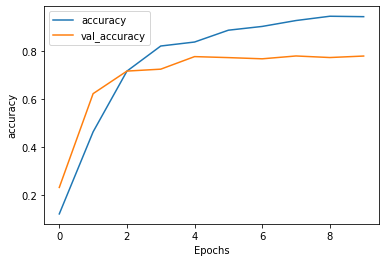

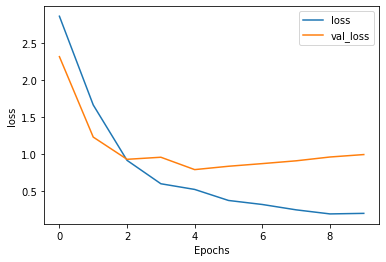

In [45]:
# Plot graphs for accuracy and loss
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")